<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2021 Exam Coding 1
***

This exam coding segment is due on Canvas by **11:59 PM on Friday October 15*. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  


Note: There are a number of images in this problem.  If you can't get them to display properly, they are hosted [here](https://drive.google.com/drive/folders/1Dl7ndZbcSZhIRM-1_OXXue5D8VgMd9NP?usp=sharing).  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
2. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
3. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be a bit less helpful than we typically are with homework. For example, we will not check answers, significantly debug your code, and so on.  But please don't feel like you're totally alone on this: feel free to ask questions or ask for help, and we will decide how best to provide that assistance.
4. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
5. You may **NOT** post to message boards or other online resources asking for help.
6. You may **NOT** copy-paste solutions *from anywhere*.
7. You may **NOT** collaborate with classmates or anyone else.
8. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this exam coding assignment or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**NOTES**: 

- You may not use late days on the exam coding nor can you drop your exam coding grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a exam coding clarifications thread. (NB: you should use public posts for the epidemiology "warmup" prompts).
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. The exam coding assignmnet is designed to be completed using only the packages in the first given code cell.
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Bottom](#bot)

---

In [1]:
from scipy import stats
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

## [40 points] Problem 1: Working with Data

You've been hired as part of the data team for the hit new mobile game, *League of Fledglings*, where you choose an adorable baby animal as your avatar and wage "battles" with other players to determine who will rule over Baby Animal Farm.  Being a mobile game, *League of Fledglings* is highly monetized, and players are regularly encouraged to purchase access to *Fledgies*, which alter the appearance of your in-game avatar fledgling.  After all, why use a regular baby elephant when you could pay money to use a *chartreuse* baby elephant?  

After each game, players are asked to evaluate how much they enjoyed that game (on a scale of 1-10).  They are also presented with a link to a new *Fledgie* to consider purchasing.

In `pay2win.csv` your bosses have provided you with one month's player data.  Each of the 2430 rows are the data for a different user.  For each player, you have been provided with the following:

- Age: the player's self-reported age on account creation.
- Sex: the player's self-reported sex on account creation.  A "choose not to report/nonbinary" option is available.
- Interest: the player's median response to the "enjoyment" poll.
- Clicks: the number of times that month that the player clicked on the link to a new *Fledgie*.
- Purchased: the dollar amount purchased by the player that month.


In [2]:
df=pd.read_csv('pay2win.csv')

**Part A:** Explore

Create histograms of each of the 5 columns.  For each variable, describe how many modes it has and if it's unimodal whether or not it exhibits any skewness (be careful with binning on `Purchased`).  Use `df.describe` to get an overall picture of the data.

,Unnamed: 0,Age,Interest,Clicks,Purchased
count,7580.000000,7580.000000,7580.000000,7580.000000,7580.000000
mean,4982.551847,43.076898,5.615172,1.728232,86.893230
std,2879.073283,15.973868,2.372559,1.874199,155.192298
min,0.000000,8.000000,0.000000,0.000000,0.000000
25%,2513.750000,29.787473,3.000000,0.000000,0.000000
50%,4951.500000,43.105088,6.000000,1.000000,0.000000
75%,7470.250000,56.715565,7.000000,3.000000,123.644589
max,9999.000000,76.343229,10.000000,14.000000,1502.236449


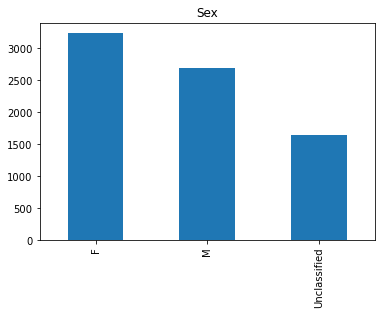

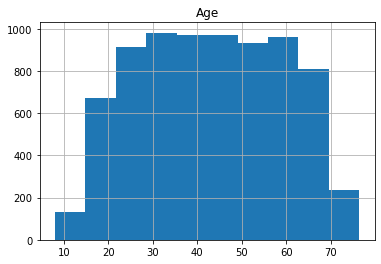

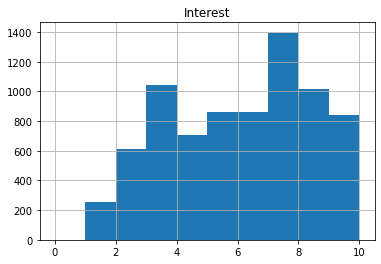

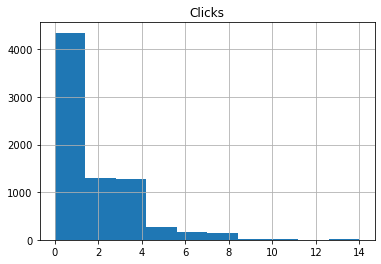

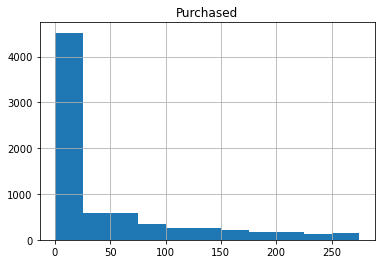

In [3]:
#make histograms, use describe
df.Sex.value_counts().plot.bar()
plt.title('Sex')
df.hist('Age')
df.hist('Interest')
df.hist('Clicks')
df.hist('Purchased', bins=[0,25,75,100,125,150,175,200,225,250,275])


df.describe()



Sex - One mode, categorical data 

Age - Symmetric with one mode 

Interest - Left skewed with two modes

Clicks - Right skewed with one mode

Purchased - Right skewed with one mode



**Part B:** Shape

The data provided is *simulated*; Zach will share the code used to generate it with the solutions.  Many in-class distributions were used to create the data!  In particular:

- (i) One column was created with a uniform random variable.
- (ii) Another column was created with `stats.poisson.rvs`
- (iii) One column was created by summing a number of `stats.expon.rvs`

Based on the data provided, which columns could have been made by the functions in (i)-(iii)?

(i) Age
(ii) Clicks 
(iii) Purchased 

**Part C:** Analyze relationships

Management wants to know how their surveys are useful in determining either clicks or purchases, and how their clicks are converted into sales.  To that end, create the following plots:
- A line plot that shows survey score versus mean purchase values for that interest level
- A pair of overlayed density histograms that show the purchase values of customers that return survery values of 5 or less against those that return survery values of 6 or more.
- A scatter plot that shows clicks versus purchase values 

Tell management if there appears to be a visual relationship between survey results and purchases.

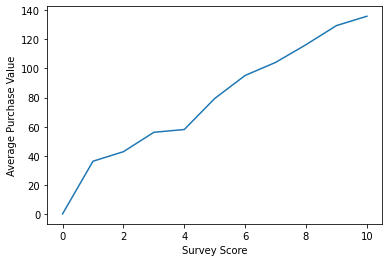

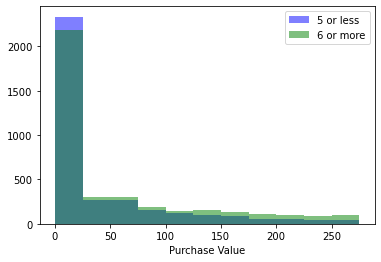

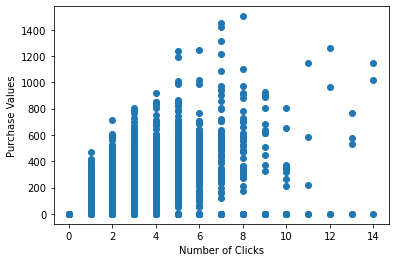

In [4]:
#Plots!
interest_purchase=[0]*11
interest_sums=[0]*11
for i in range(0, df.shape[0]): 
    interest_purchase[int(df['Interest'][i])]+=df['Purchased'][i]
    interest_sums[int(df['Interest'][i])]+=1
for i in range(len(interest_purchase)):
    interest_purchase[i]=interest_purchase[i]/interest_sums[i]
plt.plot(interest_purchase)
plt.xlabel('Survey Score')
plt.ylabel('Average Purchase Value')
plt.show()

less5=df.loc[df['Interest']<=5]
great6=df.loc[df['Interest']>=6]
plt.hist(less5['Purchased'],bins=[0,25,75,100,125,150,175,200,225,250,275], alpha = 0.5, label='5 or less', color='b')
plt.hist(great6['Purchased'],bins=[0,25,75,100,125,150,175,200,225,250,275], alpha = 0.5, label='6 or more', color='g')
plt.xlabel('Purchase Value')
plt.legend()
plt.show()

plt.scatter(x=df['Clicks'], y=df['Purchased'])
plt.xlabel('Number of Clicks')
plt.ylabel('Purchase Values')
plt.show()

From the the first plot, we can see that the higher the survey score, the higher the average purchase value. The second plot furthers this idea, indicating that people with a survey score above 6 had more, higher purchase values and less, lower purchase values than those with a survey score of 5 or less.

**Part D:** Analyze *bands*

We want to keep our high-paying job in advertising technology (plus we get some free *Fledgies* each month, nice!), so we need to tell our bosses how well the ads are working, and who they are working on.  Player ages span from 8 years old to 78 years old.  Breaking down the data into **bands** of 10-years (e.g. $[8-18), [18-27.99), \dots [68-78]$) and split across the player's self-reported sex (3 possibilities).

Output the averages for interest, clicks, and purchases for each band as well as the average value of purchases-per-click.

In other words, report the requested averages
- For each Sex
- For each Age Band
- For each Sex+Age Band combination

In [5]:
#Make bands, and compute relevant stats for each
band1=df.loc[(df['Age']>=8) & (df['Age']<18)]
band2=df.loc[(df['Age']>=18) & (df['Age']<28)]
band3=df.loc[(df['Age']>=28) & (df['Age']<38)]
band4=df.loc[(df['Age']>=38) & (df['Age']<48)]
band5=df.loc[(df['Age']>=48) & (df['Age']<58)]
band6=df.loc[(df['Age']>=58) & (df['Age']<68)]
band7=df.loc[(df['Age']>=68) & (df['Age']<=78)]

band_f=df.loc[df['Sex']=='F']
band_m=df.loc[df['Sex']=='M']
band_u=df.loc[df['Sex']=='Unclassified']

band1_f=df.loc[(df['Age']>=8) & (df['Age']<18) & (df['Sex']=='F')]
band1_m=df.loc[(df['Age']>=8) & (df['Age']<18) & (df['Sex']=='M')]
band1_u=df.loc[(df['Age']>=8) & (df['Age']<18) & (df['Sex']=='Unclassified')]
band2_f=df.loc[(df['Age']>=18) & (df['Age']<28) & (df['Sex']=='F')]
band2_m=df.loc[(df['Age']>=18) & (df['Age']<28) & (df['Sex']=='M')]
band2_u=df.loc[(df['Age']>=18) & (df['Age']<28) & (df['Sex']=='Unclassified')]
band3_f=df.loc[(df['Age']>=28) & (df['Age']<38) & (df['Sex']=='F')]
band3_m=df.loc[(df['Age']>=28) & (df['Age']<38) & (df['Sex']=='M')]
band3_u=df.loc[(df['Age']>=28) & (df['Age']<38) & (df['Sex']=='Unclassified')]
band4_f=df.loc[(df['Age']>=38) & (df['Age']<48) & (df['Sex']=='F')]
band4_m=df.loc[(df['Age']>=38) & (df['Age']<48) & (df['Sex']=='M')]
band4_u=df.loc[(df['Age']>=38) & (df['Age']<48) & (df['Sex']=='Unclassified')]
band5_f=df.loc[(df['Age']>=48) & (df['Age']<58) & (df['Sex']=='F')]
band5_m=df.loc[(df['Age']>=48) & (df['Age']<58) & (df['Sex']=='M')]
band5_u=df.loc[(df['Age']>=48) & (df['Age']<58) & (df['Sex']=='Unclassified')]
band6_f=df.loc[(df['Age']>=58) & (df['Age']<68) & (df['Sex']=='F')]
band6_m=df.loc[(df['Age']>=58) & (df['Age']<68) & (df['Sex']=='M')]
band6_u=df.loc[(df['Age']>=58) & (df['Age']<68) & (df['Sex']=='Unclassified')]
band7_f=df.loc[(df['Age']>=68) & (df['Age']<=78) & (df['Sex']=='F')]
band7_m=df.loc[(df['Age']>=68) & (df['Age']<=78) & (df['Sex']=='M')]
band7_u=df.loc[(df['Age']>=68) & (df['Age']<=78) & (df['Sex']=='Unclassified')]

In [6]:
#Average interest for each sex
print('Average Interest for Females')
print(band_f['Interest'].sum()/band_f.shape[0])
print('Average Interest for Males')
print(band_m['Interest'].sum()/band_m.shape[0])
print('Average Interest for Unclassified')
print(band_u['Interest'].sum()/band_u.shape[0])
print('')
#Average clicks for each sex
print('Average Clicks for Females')
print(band_f['Clicks'].sum()/band_f.shape[0])
print('Average Clicks for Males')
print(band_m['Clicks'].sum()/band_m.shape[0])
print('Average Clicks for Unclassified')
print(band_u['Clicks'].sum()/band_u.shape[0])
print('')
#Average Purchased for each sex
print('Average Purchases for Females')
print(band_f['Purchased'].sum()/band_f.shape[0])
print('Average Purchases for Males')
print(band_m['Purchased'].sum()/band_m.shape[0])
print('Average Purchases for Unclassified')
print(band_u['Purchased'].sum()/band_u.shape[0])
print('')
#Average Purchases/Click for each sex
print('Average Purchases/Click for Females')
print((band_f['Purchased'].sum()/band_f.shape[0])/(band_f['Clicks'].sum()/band_f.shape[0]))
print('Average Purchases/Click for Males')
print((band_m['Purchased'].sum()/band_m.shape[0])/(band_m['Clicks'].sum()/band_m.shape[0]))
print('Average Purchases/Click for Unclassified')
print((band_u['Purchased'].sum()/band_u.shape[0])/(band_u['Clicks'].sum()/band_u.shape[0]))
print('')
####

Average Interest for Females
5.14426938523324
Average Interest for Males
6.16815144766147
Average Interest for Unclassified
5.636143117040631

Average Clicks for Females
1.6345381526104417
Average Clicks for Males
2.442835931700074
Average Clicks for Unclassified
0.7446937537901759

Average Purchases for Females
94.65805913305125
Average Purchases for Males
110.17512939701668
Average Purchases for Unclassified
33.614765805371995

Average Purchases/Click for Females
57.911195882382714
Average Purchases/Click for Males
45.10132177413204
Average Purchases/Click for Unclassified
45.139046264705556



In [7]:
#Average interest for each age branch
print('Average Interest for Ages 8-17.99')
print(band1['Interest'].sum()/band1.shape[0])
print('Average Interest for Ages 18-27.99')
print(band2['Interest'].sum()/band2.shape[0])
print('Average Interest for Ages 28-37.99')
print(band3['Interest'].sum()/band3.shape[0])
print('Average Interest for Ages 38-47.99')
print(band4['Interest'].sum()/band4.shape[0])
print('Average Interest for Ages 48-57.99')
print(band5['Interest'].sum()/band5.shape[0])
print('Average Interest for Ages 58-67.99')
print(band6['Interest'].sum()/band6.shape[0])
print('Average Interest for Ages 68-78')
print(band7['Interest'].sum()/band7.shape[0])
print('')
#Average clicks for each age branch
print('Average Clicks for Ages 8-17.99')
print(band1['Clicks'].sum()/band1.shape[0])
print('Average Clicks for Ages 18-27.99')
print(band2['Clicks'].sum()/band2.shape[0])
print('Average Clicks for Ages 28-37.99')
print(band3['Clicks'].sum()/band3.shape[0])
print('Average Clicks for Ages 38-47.99')
print(band4['Clicks'].sum()/band4.shape[0])
print('Average Clicks for Ages 48-57.99')
print(band5['Clicks'].sum()/band5.shape[0])
print('Average Clicks for Ages 58-67.99')
print(band6['Clicks'].sum()/band6.shape[0])
print('Average Clicks for Ages 68-78')
print(band7['Clicks'].sum()/band7.shape[0])
print('')
#Average Purchased for each age branch
print('Average Purchases for Ages 8-17.99')
print(band1['Purchased'].sum()/band1.shape[0])
print('Average Purchases for Ages 18-27.99')
print(band2['Purchased'].sum()/band2.shape[0])
print('Average Purchases for Ages 28-37.99')
print(band3['Purchased'].sum()/band3.shape[0])
print('Average Purchases for Ages 38-47.99')
print(band4['Purchased'].sum()/band4.shape[0])
print('Average Purchases for Ages 48-57.99')
print(band5['Purchased'].sum()/band5.shape[0])
print('Average Purchases for Ages 58-67.99')
print(band6['Purchased'].sum()/band6.shape[0])
print('Average Purchases for Ages 68-78')
print(band7['Purchased'].sum()/band7.shape[0])
print('')
#Average Purchases/Clicks for each age branch
print('Average Purchases/Clicks for Ages 8-17.99')
print((band1['Purchased'].sum()/band1.shape[0])/(band1['Clicks'].sum()/band1.shape[0]))
print('Average Purchases/Clicks for Ages 18-27.99')
print((band2['Purchased'].sum()/band2.shape[0])/(band2['Clicks'].sum()/band2.shape[0]))
print('Average Purchases/Clicks for Ages 28-37.99')
print((band3['Purchased'].sum()/band3.shape[0])/(band3['Clicks'].sum()/band3.shape[0]))
print('Average Purchases/Clicks for Ages 38-47.99')
print((band4['Purchased'].sum()/band4.shape[0])/(band4['Clicks'].sum()/band4.shape[0]))
print('Average Purchases/Clicks for Ages 48-57.99')
print((band5['Purchased'].sum()/band5.shape[0])/(band5['Clicks'].sum()/band5.shape[0]))
print('Average Purchases/Clicks for Ages 58-67.99')
print((band6['Purchased'].sum()/band6.shape[0])/(band6['Clicks'].sum()/band6.shape[0]))
print('Average Purchases/Clicks for Ages 68-78')
print((band7['Purchased'].sum()/band7.shape[0])/(band7['Clicks'].sum()/band7.shape[0]))
print('')



Average Interest for Ages 8-17.99
6.512820512820513
Average Interest for Ages 18-27.99
5.640984908657665
Average Interest for Ages 28-37.99
5.638162544169611
Average Interest for Ages 38-47.99
5.6814404432132966
Average Interest for Ages 48-57.99
5.577893175074184
Average Interest for Ages 58-67.99
5.565604151223129
Average Interest for Ages 68-78
4.565333333333333

Average Clicks for Ages 8-17.99
1.8512820512820514
Average Clicks for Ages 18-27.99
1.584590945194599
Average Clicks for Ages 28-37.99
1.6558303886925796
Average Clicks for Ages 38-47.99
1.6551246537396123
Average Clicks for Ages 48-57.99
1.704005934718101
Average Clicks for Ages 58-67.99
1.949592290585619
Average Clicks for Ages 68-78
1.928

Average Purchases for Ages 8-17.99
53.339471788776976
Average Purchases for Ages 18-27.99
70.92306476143499
Average Purchases for Ages 28-37.99
102.89017301199702
Average Purchases for Ages 38-47.99
91.78965905556184
Average Purchases for Ages 48-57.99
75.23891800384247
Average Purchas

In [8]:

### Averages for age and sex
print('Average Interest for Females Ages 8-17.99')
print(band1_f['Interest'].sum()/band1_f.shape[0])
print('Average Interest for Males Ages 8-17.99')
print(band1_m['Interest'].sum()/band1_m.shape[0])
print('Average Interest for Unclassified Ages 8-17.99')
print(band1_u['Interest'].sum()/band1_u.shape[0])

print('Average Interest for Females Ages 18-27.99')
print(band2_f['Interest'].sum()/band2_f.shape[0])
print('Average Interest for Males Ages 18-27.99')
print(band2_m['Interest'].sum()/band2_m.shape[0])
print('Average Interest for Unclassified Ages 18-27.99')
print(band2_u['Interest'].sum()/band2_u.shape[0])

print('Average Interest for Females Ages 28-37.99')
print(band3_f['Interest'].sum()/band3_f.shape[0])
print('Average Interest for Males Ages 28-37.99')
print(band3_m['Interest'].sum()/band3_m.shape[0])
print('Average Interest for Unclassified Ages 28-37.99')
print(band3_u['Interest'].sum()/band3_u.shape[0])

print('Average Interest for Females Ages 38-47.99')
print(band4_f['Interest'].sum()/band4_f.shape[0])
print('Average Interest for Males Ages 38-47.99')
print(band4_m['Interest'].sum()/band4_m.shape[0])
print('Average Interest for Unclassified Ages 38-47.99')
print(band4_u['Interest'].sum()/band4_u.shape[0])

print('Average Interest for Females Ages 48-57.99')
print(band5_f['Interest'].sum()/band5_f.shape[0])
print('Average Interest for Males Ages 48-57.99')
print(band5_m['Interest'].sum()/band5_m.shape[0])
print('Average Interest for Unclassified Ages 48-57.99')
print(band5_u['Interest'].sum()/band5_u.shape[0])

print('Average Interest for Females Ages 58-67.99')
print(band6_f['Interest'].sum()/band6_f.shape[0])
print('Average Interest for Males Ages 58-67.99')
print(band6_m['Interest'].sum()/band6_m.shape[0])
print('Average Interest for Unclassified Ages 58-67.99')
print(band6_u['Interest'].sum()/band6_u.shape[0])

print('Average Interest for Females Ages 68-78')
print(band7_f['Interest'].sum()/band7_f.shape[0])
print('Average Interest for Males Ages 68-78')
print(band7_m['Interest'].sum()/band7_m.shape[0])
print('Average Interest for Unclassified Ages 68-78')
print(band7_u['Interest'].sum()/band7_u.shape[0])
print('')

print('Average Clicks for Females Ages 8-17.99')
print(band1_f['Clicks'].sum()/band1_f.shape[0])
print('Average Clicks for Males Ages 8-17.99')
print(band1_m['Clicks'].sum()/band1_m.shape[0])
print('Average Clicks for Unclassified Ages 8-17.99')
print(band1_u['Clicks'].sum()/band1_u.shape[0])

print('Average Clicks for Females Ages 18-27.99')
print(band2_f['Clicks'].sum()/band2_f.shape[0])
print('Average Clicks for Males Ages 18-27.99')
print(band2_m['Clicks'].sum()/band2_m.shape[0])
print('Average Clicks for Unclassified Ages 18-27.99')
print(band2_u['Clicks'].sum()/band2_u.shape[0])

print('Average Clicks for Females Ages 28-37.99')
print(band3_f['Clicks'].sum()/band3_f.shape[0])
print('Average Clicks for Males Ages 28-37.99')
print(band3_m['Clicks'].sum()/band3_m.shape[0])
print('Average Clicks for Unclassified Ages 28-37.99')
print(band3_u['Clicks'].sum()/band3_u.shape[0])

print('Average Clicks for Females Ages 38-47.99')
print(band4_f['Clicks'].sum()/band4_f.shape[0])
print('Average Clicks for Males Ages 38-47.99')
print(band4_m['Clicks'].sum()/band4_m.shape[0])
print('Average Clicks for Unclassified Ages 38-47.99')
print(band4_u['Clicks'].sum()/band4_u.shape[0])

print('Average Clicks for Females Ages 48-57.99')
print(band5_f['Clicks'].sum()/band5_f.shape[0])
print('Average Clicks for Males Ages 48-57.99')
print(band5_m['Clicks'].sum()/band5_m.shape[0])
print('Average Clicks for Unclassified Ages 48-57.99')
print(band5_u['Clicks'].sum()/band5_u.shape[0])

print('Average Clicks for Females Ages 58-67.99')
print(band6_f['Clicks'].sum()/band6_f.shape[0])
print('Average Clicks for Males Ages 58-67.99')
print(band6_m['Clicks'].sum()/band6_m.shape[0])
print('Average Clicks for Unclassified Ages 58-67.99')
print(band6_u['Clicks'].sum()/band6_u.shape[0])

print('Average Clicks for Females Ages 68-78')
print(band7_f['Clicks'].sum()/band7_f.shape[0])
print('Average Clicks for Males Ages 68-78')
print(band7_m['Clicks'].sum()/band7_m.shape[0])
print('Average Clicks for Unclassified Ages 68-78')
print(band7_u['Clicks'].sum()/band7_u.shape[0])
print('')

print('Average Purchased for Females Ages 8-17.99')
print(band1_f['Purchased'].sum()/band1_f.shape[0])
print('Average Purchased for Males Ages 8-17.99')
print(band1_m['Purchased'].sum()/band1_m.shape[0])
print('Average Purchased for Unclassified Ages 8-17.99')
print(band1_u['Purchased'].sum()/band1_u.shape[0])

print('Average Purchased for Females Ages 18-27.99')
print(band2_f['Purchased'].sum()/band2_f.shape[0])
print('Average Purchased for Males Ages 18-27.99')
print(band2_m['Purchased'].sum()/band2_m.shape[0])
print('Average Purchased for Unclassified Ages 18-27.99')
print(band2_u['Purchased'].sum()/band2_u.shape[0])

print('Average Purchased for Females Ages 28-37.99')
print(band3_f['Purchased'].sum()/band3_f.shape[0])
print('Average Purchased for Males Ages 28-37.99')
print(band3_m['Purchased'].sum()/band3_m.shape[0])
print('Average Purchased for Unclassified Ages 28-37.99')
print(band3_u['Purchased'].sum()/band3_u.shape[0])

print('Average Purchased for Females Ages 38-47.99')
print(band4_f['Purchased'].sum()/band4_f.shape[0])
print('Average Purchased for Males Ages 38-47.99')
print(band4_m['Purchased'].sum()/band4_m.shape[0])
print('Average Purchased for Unclassified Ages 38-47.99')
print(band4_u['Purchased'].sum()/band4_u.shape[0])

print('Average Purchased for Females Ages 48-57.99')
print(band5_f['Purchased'].sum()/band5_f.shape[0])
print('Average Purchased for Males Ages 48-57.99')
print(band5_m['Purchased'].sum()/band5_m.shape[0])
print('Average Purchased for Unclassified Ages 48-57.99')
print(band5_u['Purchased'].sum()/band5_u.shape[0])

print('Average Purchased for Females Ages 58-67.99')
print(band6_f['Purchased'].sum()/band6_f.shape[0])
print('Average Purchased for Males Ages 58-67.99')
print(band6_m['Purchased'].sum()/band6_m.shape[0])
print('Average Purchased for Unclassified Ages 58-67.99')
print(band6_u['Purchased'].sum()/band6_u.shape[0])

print('Average Purchased for Females Ages 68-78')
print(band7_f['Purchased'].sum()/band7_f.shape[0])
print('Average Purchased for Males Ages 68-78')
print(band7_m['Purchased'].sum()/band7_m.shape[0])
print('Average Purchased for Unclassified Ages 68-78')
print(band7_u['Purchased'].sum()/band7_u.shape[0])
print('')


print('Average Purchases/Clicks for Females Ages 8-17.99')
print((band1_f['Purchased'].sum()/band1_f.shape[0])/(band1_f['Clicks'].sum()/band1_f.shape[0]))
print('Average Purchased for Males Ages 8-17.99')
print((band1_m['Purchased'].sum()/band1_m.shape[0])/(band1_m['Clicks'].sum()/band1_m.shape[0]))
print('Average Purchased for Unclassified Ages 8-17.99')
print((band1_u['Purchased'].sum()/band1_u.shape[0])/(band1_u['Clicks'].sum()/band1_u.shape[0]))

print('Average Purchases/Clicks for Females Ages 18-27.99')
print((band2_f['Purchased'].sum()/band2_f.shape[0])/(band2_f['Clicks'].sum()/band2_f.shape[0]))
print('Average Purchases/Clicks for Males Ages 18-27.99')
print((band2_m['Purchased'].sum()/band2_m.shape[0])/(band2_m['Clicks'].sum()/band2_m.shape[0]))
print('Average Purchases/Clicks for Unclassified Ages 18-27.99')
print((band2_u['Purchased'].sum()/band2_u.shape[0])/(band2_u['Clicks'].sum()/band2_u.shape[0]))

print('Average Purchases/Clicks for Females Ages 28-37.99')
print((band3_f['Purchased'].sum()/band3_f.shape[0])/(band3_f['Clicks'].sum()/band3_f.shape[0]))
print('Average Purchases/Clicks for Males Ages 28-37.99')
print((band3_m['Purchased'].sum()/band3_m.shape[0])/(band3_m['Clicks'].sum()/band3_m.shape[0]))
print('Average Purchases/Clicks for Unclassified Ages 28-37.99')
print((band3_u['Purchased'].sum()/band3_u.shape[0])/(band3_u['Clicks'].sum()/band3_u.shape[0]))

print('Average Purchases/Clicks for Females Ages 38-47.99')
print((band4_f['Purchased'].sum()/band4_f.shape[0])/(band4_f['Clicks'].sum()/band4_f.shape[0]))
print('Average Purchases/Clicks for Males Ages 38-47.99')
print((band4_m['Purchased'].sum()/band4_m.shape[0])/(band4_m['Clicks'].sum()/band4_m.shape[0]))
print('Average Purchases/Clicks for Unclassified Ages 38-47.99')
print((band4_u['Purchased'].sum()/band4_u.shape[0])/(band4_u['Clicks'].sum()/band4_u.shape[0]))

print('Average Purchases/Clicks for Females Ages 48-57.99')
print((band5_f['Purchased'].sum()/band5_f.shape[0])/(band5_f['Clicks'].sum()/band5_f.shape[0]))
print('Average Purchases/Clicks for Males Ages 48-57.99')
print((band5_m['Purchased'].sum()/band5_m.shape[0])/(band5_m['Clicks'].sum()/band5_m.shape[0]))
print('Average Purchases/Clicks for Unclassified Ages 48-57.99')
print((band5_u['Purchased'].sum()/band5_u.shape[0])/(band5_u['Clicks'].sum()/band5_u.shape[0]))

print('Average Purchases/Clicks for Females Ages 58-67.99')
print((band6_f['Purchased'].sum()/band6_f.shape[0])/(band6_f['Clicks'].sum()/band6_f.shape[0]))
print('Average Purchases/Clicks for Males Ages 58-67.99')
print((band6_m['Purchased'].sum()/band6_m.shape[0])/(band6_m['Clicks'].sum()/band6_m.shape[0]))
print('Average Purchases/Clicks for Unclassified Ages 58-67.99')
print((band6_u['Purchased'].sum()/band6_u.shape[0])/(band6_u['Clicks'].sum()/band6_u.shape[0]))

print('Average Purchases/Clicks for Females Ages 68-78')
print((band7_f['Purchased'].sum()/band7_f.shape[0])/(band7_f['Clicks'].sum()/band7_f.shape[0]))
print('Average Purchases/Clicks for Males Ages 68-78')
print((band7_m['Purchased'].sum()/band7_m.shape[0])/(band7_m['Clicks'].sum()/band7_m.shape[0]))
print('Average Purchases/Clicks for Unclassified Ages 68-78')
print((band7_u['Purchased'].sum()/band7_u.shape[0])/(band7_u['Clicks'].sum()/band7_u.shape[0]))
print('')




Average Interest for Females Ages 8-17.99
5.99009900990099
Average Interest for Males Ages 8-17.99
7.410526315789474
Average Interest for Unclassified Ages 8-17.99
6.731182795698925
Average Interest for Females Ages 18-27.99
5.061151079136691
Average Interest for Males Ages 18-27.99
6.424882629107981
Average Interest for Unclassified Ages 18-27.99
5.59927797833935
Average Interest for Females Ages 28-37.99
5.115966386554621
Average Interest for Males Ages 28-37.99
6.2727272727272725
Average Interest for Unclassified Ages 28-37.99
5.580858085808581
Average Interest for Females Ages 38-47.99
5.2270531400966185
Average Interest for Males Ages 38-47.99
6.254302103250478
Average Interest for Unclassified Ages 38-47.99
5.623333333333333
Average Interest for Females Ages 48-57.99
5.203448275862069
Average Interest for Males Ages 48-57.99
5.92948717948718
Average Interest for Unclassified Ages 48-57.99
5.753333333333333
Average Interest for Females Ages 58-67.99
5.144688644688645
Average Inter

**Part E:** Discuss

Discuss the results from **D** *in detail*.  In particular, you should do the following:
- (i) Highlight the general trend of bands: which ages/sexes tend to buy more or less?  Which ages tend to buy more or less?
- (ii) Are there any bands that suggest some age groups behave differently between men and women?  Which ones, and how do they differ?
- (iii) What groups should management target if they want to target the groups that currently purchase the most?
- (iv) What groups might management target if they want to target groups with unusually low purchases?
- (v) Does the highest "Interest" subgroup purchase the most?  Is this consistent with your results in **C**?

i) Considering gender, males tend to purchase and click more than females and unclassifieds. However, females tend to have more clicks per purchases.  Unclassified tends to have fewer clicks and purchases, however males and unclassified have similar purhcases per clicks which is less than that of females.     
Considering age, ages 58-67.99 tend to purchase and click more than the other age bands.  However, ages ages 38-47.99 and ages 58-67.99 tend to have more clicks per purchases. Ages 18-27.99 tend to have fewer clicks, ages 8-17.99 tend to have fewer purchases and fewer purchases per clicks.     
Considering both age and gender, males ages 58-67.99 tend to click more, females ages 58-67.99 tend to purchase more and have the most clicks per purchases. Unclassified ages 18-27.99 tend to have fewer clicks, unclassified ages 68-78 tend to have fewer purchases and fewer average purchases per clicks.

ii) Yes, most age groups behave differently for men and women.  However, there are three age groups that have the most drastic differences.  The first is the ages 58-67.99 where the average purhcases and clicks per purchases of females is much higher than that of the males.  The second is the ages 28-37.99 where the males have much higher average purchases, but similar average purchases per clicks to females.  The third age group is ages 68-78 where both the average purchases and purchases per clicks is higher for females than males, but purchases per clicks notably so. 

iii)To target the groups that currently purchase the most, the management should focus on females ages 58-67.99 and males ages 28-37.99.

iv) To target the groups that have unusually low purchases, the management should focus on unclassified ages 8-17.99 and unclassified ages 68-78.

v) The subgroup with the highest interest is males ages 8-17.99. However, this subgroup does not purchase the most.  This is not consistent with the results in C, but does not disprove the notion that on average a higher interest score corresponds with a higher purchase average.

<br>

---
[Back to top](#top)
<a id='p2'></a>

## [60 points] Problem 2: An Intro to Computational Epidemiology

### The Model

In this problem we introduce and begin to explore some of the baseline tools of computational epidemiology: the SIR and SI models.  

These models exist on graphs, where vertices or nodes represent people, agents, or surfaces that might carry a communicable disease.  Edges connecting nodes represent persons that are in close contact with one another, and at risk of exchanging the disease.  


We will implement a variant of the SIR model.  In this model, each vertex has one of three possible states:
 - **I** for Infected, and at risk of passing the disease to neighboring susceptible vertices.
 - **S** for Susceptible, and at risk of becoming infected by its neighbors
 - **R** for removed, and no longer at risk of contracting or spreading the infection.

The model evolves *iteratively*, where for each discrete time step (one unit of `time`) the following two calculations occur:

** Step 1:** First, consider all **edges** that connect an infected person to a susceptible person.  The susceptible vertex becomes infected with independent and identical probability $\beta$ *for each* edge that that connects them to an infected vertex.  This is depicted below in the SIR_Edges.png image.

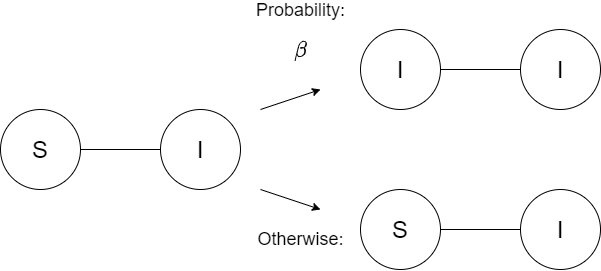

A susceptible edge can only be infected once, and is only at risk of being infected by nodes that were infected (**I**) at the *start* of each iteration: newly infected nodes don't pass the infection onwards until the next time step.

** Step 2: ** Next, consider all infected (**I**) **vertices** that were infected at the *start* of the time step - prior to step 1 - and consider them recovered **R** with probability $\gamma$.  This is depicted below in the SIR_Removal.png image.

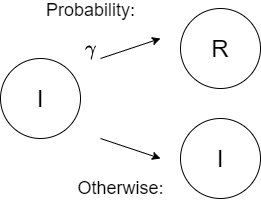

Think of this process as the probability of becoming well: not only are those ndoes no longer contagious, they also have developed antibodies that make them immune to re-infection!

The model can run for any number of time steps, but for reasonably small graphs we might expect to see the number of infections taper off to zero after a while.  If you watched any news coverage during the onset of COVID-19, one of the main tasks in predicting a pandemic is predicting the *basic reproduction number* $R_0= \frac{\beta}{\gamma}$ of the disease.  Since $\beta$ represents a rate of spread and $\gamma$ represents a rate of recovery, the ratio is important in determining whether a disease spreads faster than recovery can occur.

### Warmups (These *are* graded)

A couple of quick questions to make sure we're understanding the model and the roles of $\beta$ and $\gamma$.

Feel free to use office hours/piazza to ask more pointed questions about the Warmups **only** to make sure you understand the basics of the transition model before you approach the implementation section later.

**Part A**

Suppose we have the small system depicted at time $t=0$ below, in SIR_Warmup1.png.

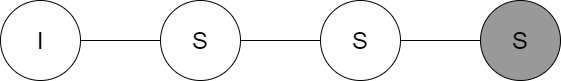

- What is the exact probability that the last node on the right is an infected node **I** after exactly 3 time steps?  

- What is the exact probability that the leftmost node is still infected at this time?  

P(I_1)P(I_2)P(I_3)=$\beta^3$

P(R_1)P(R_2)P(R_3)=$(1-\gamma)^3$ 

**Part B**: Use your named distributions.
- Each of the prior 2 questions is exactly described by one of the named variables covered in class.  Which variable, at what value(s) are we evaluating its pdf, and what is its parameter?
- What is the average (mean) recovery time for an infected person?
- Suppose an `S` node has exactly 4 `I` neighbors, and the probability of transmission is $\beta=0.5$.  What is the exact probability that that $S$ node is infected in the next time step?

1) Binomial distribution, number of successes in a fixed number of tries, number of successes 


2) $\frac{1}{\gamma}$  time steps

3) 1-(1)(.5)^0(1-.5)^4=0.9375



**Part C**

Suppose we consider the alternative 4-vertex graph depicted below, in SIR_Warmup2.png.

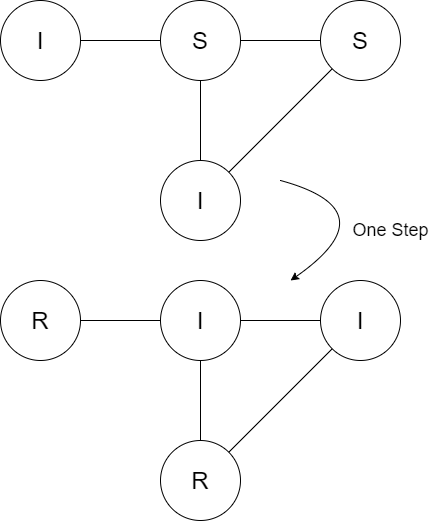

- What is the exact probability that we transition from the graph on the top to the exact graph on the bottom in a single time step?  

Note that the "center" **S** node with two infected neighbors should be more likely to end up infected than rightmost node.

P(I_1->R)P(I_2->R)P(S_1->I)P(S_2->I)=$\gamma*\gamma*(1-(1)(\beta)^0(1-\beta)^2))((1-(1)(\beta)^0(1-\beta)^1))$
$=\gamma^2(1-(1-\beta)^2)(\beta)$ 

### Coding The Model

Enough with the exact pen-and-paper solutions!  Let's run this model.  Suppose we wish to implement the SIR model on the graph below (SIR_graph.png):

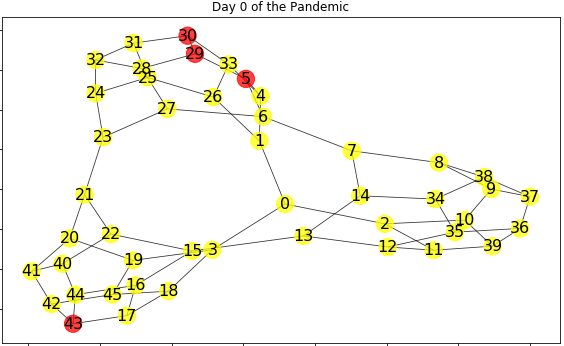

For your convenience, the two most common ways to represent this are listed below.  `edges` contains a list of each of the edges of the graph, and `neighbors` is a dictionary that contains the neighbors of each node (as a list of connected nodes).

`nodes` holds the 46 vertices, labelled by their indexes 0 through 45.
`neighbors` is a dictionary, where e.g. `neighbors[1]` holds the list of neighboring vertices to vertex #1.

In [9]:
#manual edge assignments
edges=[(0, 1), (0, 2), (0, 3), (1, 4), (1, 26), (2, 10), (2, 11), (3, 18), (3, 19), \
       (4, 5), (4, 33), (5, 6), (5, 29), (6, 7), (6, 27), (7, 8), (7, 14), (8, 9), (8, 38), \
       (9, 10), (9, 37), (10, 39), (11, 12), (11, 39), (12, 13), (12, 35), (13, 14), (13, 15),\
       (14, 34), (15, 16), (15, 22), (16, 17), (16, 44), (17, 18), (17, 43), (18, 45), (19, 20), \
       (19, 45), (20, 21), (20, 41), (21, 22), (21, 23), (22, 40), (23, 24), (23, 27), (24, 25), \
       (24, 32), (25, 26), (25, 31), (26, 33), (27, 28), (28, 29), (28, 32), (29, 30), (30, 31), \
       (30, 33), (31, 32), (34, 35), (34, 38), (35, 36), (36, 37), (36, 39), (37, 38), (40, 41), \
       (40, 44), (41, 42), (42, 43), (42, 45), (43, 44)]

#create a dictionary as option
nodes = list(range(46))
neighbors={key: [] for key in range(len(nodes))} 
for edge in edges:
    neighbors[edge[0]].append(edge[1])
    neighbors[edge[1]].append(edge[0])
    
#other useful variables
nodes = list(range(21))
N = len(nodes)
#Dictionary usage:
for node in neighbors:
    print('Node # ',node, ' has neighbors of ', neighbors[node])

Node #  0  has neighbors of  [1, 2, 3]
Node #  1  has neighbors of  [0, 4, 26]
Node #  2  has neighbors of  [0, 10, 11]
Node #  3  has neighbors of  [0, 18, 19]
Node #  4  has neighbors of  [1, 5, 33]
Node #  5  has neighbors of  [4, 6, 29]
Node #  6  has neighbors of  [5, 7, 27]
Node #  7  has neighbors of  [6, 8, 14]
Node #  8  has neighbors of  [7, 9, 38]
Node #  9  has neighbors of  [8, 10, 37]
Node #  10  has neighbors of  [2, 9, 39]
Node #  11  has neighbors of  [2, 12, 39]
Node #  12  has neighbors of  [11, 13, 35]
Node #  13  has neighbors of  [12, 14, 15]
Node #  14  has neighbors of  [7, 13, 34]
Node #  15  has neighbors of  [13, 16, 22]
Node #  16  has neighbors of  [15, 17, 44]
Node #  17  has neighbors of  [16, 18, 43]
Node #  18  has neighbors of  [3, 17, 45]
Node #  19  has neighbors of  [3, 20, 45]
Node #  20  has neighbors of  [19, 21, 41]
Node #  21  has neighbors of  [20, 22, 23]
Node #  22  has neighbors of  [15, 21, 40]
Node #  23  has neighbors of  [21, 24, 27]
No

**Part D:**

Implement a function **SIR_step(states, gamma, beta)** that takes one step of the SIR model with a known $\beta$ and $\gamma$ on the graph given above.

* **initial_state** should be a list/numpy array of length 46 of the state of each vertex, e.g. `['S','S','I','I','R','S',...,'I']`.
* **gamma** is the constant determining recovery rate.
* **beta** is the constant determining transmission rate.

The return of the function should be the new states for each vertex, in the same format as **initial_state**.


In [10]:
import random

def SIR_step(initial_state, gamma, beta):
    new_state=initial_state #create new state equal to initial state
    for i in range (len(initial_state)): #in length of initial state
        if (initial_state[i]=='S'): # if succeptible
            infected_edges=0 #set number of infected edges to 0 before loop
            for k in range (3): 
                if(initial_state[neighbors[i][k]]=='I'):  #if neighbor is infected
                    infected_edges+=1 #count number of infected
            if (infected_edges!=0): #if there is at least one infected neighbor
                beta1=1-stats.binom.cdf(k=0, n=infected_edges, p=beta) #at least one infection
                if (random.uniform(0,1)<=beta1): #if random value is leq than probability
                    new_state[i]='I' #set new state value to I
                else:
                    new_state[i]='S' #otherwise the person is still succeptible
            else:
                new_state[i]='S' #if no infected edges the person is still succeptible
        elif (initial_state[i]=='I'): #if person is infected
            if (random.uniform(0, 1)<=gamma): #if random variable is leq probabilty for one step
                new_state[i]='R' #they have recovered
            else:
                new_state[i]='I' #otherwise they are still infected
        elif (initial_state[i]=='R'): #if they are recovered
            new_state[i]='R'
    return new_state

Run a couple of quick sanity checks and self-checks below:
 - what should happen if `states` contains no **I** nodes?
 - what should happen if `states` contains **I** nodes but $\beta=0$?


In [11]:
#Check your code is working for those trivial cases:
initial_step1=[] #initalize initial states
initial_step2=[]
for i in range (46): #create states with no Is
    choice=random.randint(1,2)
    if (choice==1):
        initial_step1.append('R')
    else:
        initial_step1.append('S')
k=SIR_step(initial_step1, .5, .5) #contains no I nodes 
for i in range(len(initial_step1)):
    if (k[i]=='I'): #if anyone is now infected
        print('Broken')
for i in range (46):
    choice=random.randint(1,3) #create random initial state
    if (choice==1):   
        initial_step2.append('R')
    elif (choice==2):
        initial_step2.append('I')
    else:
        initial_step2.append('S')

l=SIR_step(initial_step2, .5, 0) # no one new should be infected
for i in range(len(initial_step2)):
    if (l[i]=='I' and initial_step2[i]!='I'):
        print('broken')

**Part E:**

Time to run the model for an initial set of states and describe what happens!  Suppose the initial states of each of the nodes is such that nodes 5,29,30, and 43 are infected and the rest are susceptible.  Code for this is given below.

Now we want to create a function or a loop that runs **SIR_step** for 100 time steps.  

At the end of 100 steps, we will return only a tuple of two integers.  First, the total number of nodes that were infected over the course of the epidemic; and second, and the total days spent infected across all nodes.  These are two good measures of the severity of the epidemic!  When we take 100 steps, this represents *one* example of what could happen when an infection is set loose in a small (compartmental) environment.  As data scientists, we need to run this 100-step experiment multiple times to understand the overall descriptors of our simulated pandemic!

Implement a function **SIR_sim(intial_state, gamma, beta, n_steps)** that takes *many* step of the SIR model with a known $\beta$ and $\gamma$ on the graph given above.  It should return the tuple of **(days_lost,people_infected)**

* **initial_state** should be a list/numpy array of length 46 of the state of each vertex, e.g. `['S','S','I','I','R','S',...,'I']`.
* **gamma** is the constant determining recovery rate.
* **beta** is the constant determining transmission rate.
* **n_steps** is the number of steps.  It can be defaulted as 100.
* The return **days_lost** is the number of cumulative days all people were infected.  After each call to **SIR_step**, you should increment this amount by the number of `I` entries in your state vector.
* The return **people_infected** is the number of people that were infected into state `I` at any point in the simulation.


In [12]:
#given initialization; 'states' has 42 'S' nodes and 4 'I' nodes
states=np.array(['S']*46)
infected_states=set([5,29,30, 43])

for idx in infected_states:
    states[idx]='I'

def SIR_step1(initial_state, gamma, beta, time_infected):
    new_state=initial_state #create new state equal to initial state
    for i in range (len(initial_state)): #in length of initial state
        if (initial_state[i]=='S'): # if succeptible
            infected_edges=0 #set number of infected edges to 0 before loop
            for k in range (3): 
                if(initial_state[neighbors[i][k]]=='I'):  #if neighbor is infected
                    infected_edges+=1 #count number of infected
            if (infected_edges!=0): #if there is at least one infected neighbor
                beta1=1-stats.binom.cdf(k=0, n=infected_edges, p=beta) #at least one infection
                if (random.uniform(0,1)<=beta1): #if random value is leq than probability
                    new_state[i]='I' #set new state value to I
                else:
                    new_state[i]='S' #otherwise the person is still succeptible
            else:
                new_state[i]='S' #if no infected edges the person is still succeptible
        elif (initial_state[i]=='I'): #if person is infected
            gamma1=1-stats.binom.cdf(k=0, n=time_infected[i], p=gamma) #probability no trials have been a success
            if (random.uniform(0, 1)<=gamma1): #if random variable is leq probabilty
                new_state[i]='R' #they have recovered
            else:
                new_state[i]='I' #otherwise they are still infected
                time_infected[i]+=1
        elif (initial_state[i]=='R'): #if they are recovered
            new_state[i]='R'
    return (new_state, time_infected)


def SIR_sim(gamma, beta, initial_state=states, n_steps=100):
    #do the thing!
    people_infected=4 #start with 4 infected people
    days_lost=0 #start with no days lost
    time_infected=[0]*46
    #for n_steps steps
    state=initial_state #set state variable to initial state
    for _ in range (n_steps):
        old_state=state.copy() #make copy of previous state
        (state, time_infected)=SIR_step1(state, gamma, beta, time_infected) #take an SIR step
        for i in range(len(state)):
            if (state[i]=='I'):
                days_lost+=1 #record how many additional days were lost
            if(state[i]=='I' and old_state[i]!='I'): #once done, see how many people got infected?
                people_infected+=1
    if(people_infected>46):
        print('broken')
    return days_lost, people_infected


**Part F:**

Run your function in part D 100 times (so you'll have 100 instances of 100 time steps) *each* for 3 different sets of values of the constants $\gamma$ and $\beta$.  The three sets of conditions we should run experiments under are:

* First, when the values of $\gamma$ and $\beta$ are each 0.15.
* Second, when $\beta=0.1$ and $\gamma=0.2$.
* Finally, when $\beta=0.2$ and $\gamma=0.1$.

For each one of those 3 sets of experiments, report the average number of people infected and average number of days lost to infection.

Sanity checks: 
- Person count should be at least 4, possibly up to 46.
- Days lost could be as low as 0 if everybody recovers on day 1, possibly approaching $46\cdot 100$ if everybody is infected all 100 days.

In [13]:
#recommended output style:

days_lost1=np.array([0]*100) #create arrays
people_infected1=np.array([0]*100)
for i in range(100):  #for 100 times
    states=np.array(['S']*46) #set up input arrays
    infected_states=set([5,29,30, 43])
    for idx in infected_states:
        states[idx]='I'
    beta=.15 #set beta and gamma values
    gamma=.15
    (days_lost, people_infected)=SIR_sim(gamma, beta, initial_state=states) #run simulation
    days_lost1[i]=(days_lost)
    people_infected1[i]=people_infected
people_infected=people_infected1.sum()/100 #calculate averages
days_lost=days_lost1.sum()/100
print('For beta=',beta,' and gamma=',gamma,' lost', days_lost  ,' days between ', people_infected, ' people')

#repeat for other beta and gamma values
days_lost2=np.array([0]*100)
people_infected2=np.array([0]*100)
for i in range(100):
    states=np.array(['S']*46)
    infected_states=set([5,29,30,43])
    for idx in infected_states:
        states[idx]='I'  
    beta=.1
    gamma=.2
    (days_lost, people_infected)=SIR_sim(gamma, beta, initial_state=states)
    days_lost2[i]=(days_lost)
    people_infected2[i]=people_infected
people_infected=people_infected2.sum()/100
days_lost=days_lost2.sum()/100   
print('For beta=',beta,' and gamma=',gamma,' lost', days_lost  ,' days between ', people_infected, ' people')

days_lost3=np.array([0]*100)
people_infected3=np.array([0]*100)
for i in range(100):
    states=np.array(['S']*46)
    infected_states=set([5,29,30,43])
    for idx in infected_states:
        states[idx]='I'
    beta=.2
    gamma=.1
    (days_lost, people_infected)=SIR_sim(gamma, beta, initial_state=states)
    days_lost3[i]=(days_lost)
    people_infected3[i]=people_infected
people_infected=people_infected3.sum()/100
days_lost=days_lost3.sum()/100       
print('For beta=',beta,' and gamma=',gamma,' lost', days_lost  ,' days between ', people_infected, ' people')

For beta= 0.15  and gamma= 0.15  lost 68.94  days between  17.48  people
For beta= 0.1  and gamma= 0.2  lost 30.18  days between  9.19  people
For beta= 0.2  and gamma= 0.1  lost 158.53  days between  33.28  people


** Part G: **
What does a Vaccine do?  You should have found that the settings of $\beta=0.2$ and $\gamma=0.1$ typically caused the most dangerous pandemic.  These numbers represent a disease that takes on average around 10 time steps (days) to recover from, and is highly infectious in that period: numbers reasonable for current COVID-19 data.  

But suppose we have access to a vaccine, and when a person take a vaccine they are immediately set to be type `R` removed nodes.  We want to investigate the effects of a vaccine and whether or not our model can capture the idea of "herd" immunity, where sufficient vaccination imbues protections on the unvaccinated.

Suppose *before* the start of your SIR_sim you take exactly $k$ of the 42 `S` individuals and reclassify them as `R`, representing individuals who have been innoculated against infection.  Keep the same 4 infected people at the start of each run.  Run 50 simulations *each* for the values of $k=[0,4,8,12,...,40]$ for a total of 11 additional sets of simulations.

For each one of those 11 sets of experiments, save the average number of people infected and average number of days lost to infection.  

It should be clear that vaccination helps those that *are* vaccinated, but does it help the unvaccinated as well?  After your study of $k$, create a pair of side-by-side plots.  

- In the first, make the $x$-axis is $k$ and the $y$-axis the average number of days lost.
- In the second, again make the $x$-axis is $k$ and make the $y$-axis the average *proportion of initial `S` states* infected.
- Do there appear to be any values of $k$ which lead to larger decreases than others?  Which ones? 

In [14]:
#sims
people_infected_k=[] #create arrays 
days_lost_k=[]
k=[]
for i in range(0,41,4): #for values of k
    k.append(i)
    xs=np.array([1]*50) #create arrays to keep track before finding average
    ys=np.array([1]*50)
    for c in range(50):
        
        states=np.array(['S']*46) #set up input arrays

        infected_states=set([5,29,30,43])

        for idx in infected_states:
            states[idx]='I'
        
        c=i
        j=0
        while(j<c):
            #print(j)
            if (states[j]!='I'):
                states[j]='R'
            else: #skip over I values
                c+=1
            j+=1
        ''' make sure R count matches k
        R_count=0
        for t in range(len(states)):
            if (states[t]=='R'):
                R_count+=1
        if(R_count!=i):
            print('broken')
        '''
        (x,y)=SIR_sim(.1, .2, states) #run simulation
        xs[c]=x
        ys[c]=y
    people_infected_k.append((ys.sum()/50)) #calculate sum
    days_lost_k.append((xs.sum()/50))

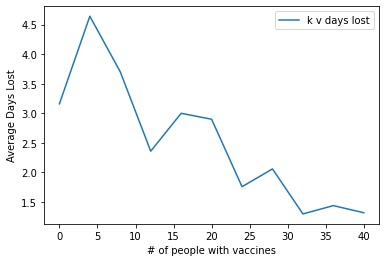

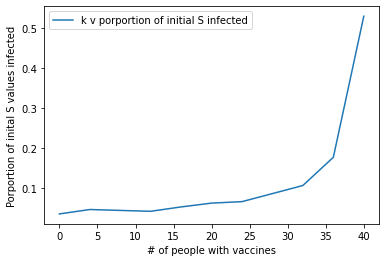

In [15]:
#plots
plt.plot(k, days_lost_k, label='k v days lost')
plt.xlabel('# of people with vaccines')
plt.ylabel('Average Days Lost')
plt.legend()
plt.show()
for i in range(len(people_infected_k)): #for each value of people_infected array 
    people_infected_k[i]=people_infected_k[i]/(42-(i*4)) #divide by number of initial S
plt.plot(k, people_infected_k, label='k v porportion of initial S infected')
plt.xlabel('# of people with vaccines')
plt.ylabel('Porportion of inital S values infected')
plt.legend()
plt.show()

**Part H: **

Comment on anything you found interesting or unusual.

Values of k between about 5 and 10 seem to cause a greater decrease in the average days lost than other values of k. 

In addition, the larger the k the higher the porportion of inital S are infected.  This is important, since if more susceptible people get sick early, the earlier they will be removed from the possiblity of getting sick and spreading the virus.

Computational epidemiology is a huge field, and models can add all kinds of added components: nodes could be surfaces *or* people, graphs could be representing cities or communities instead of individuals, etc.  One similar model is used instead for diseases that don't ever have **R** states: nodes just transition from **I** to **S** because there may be no long-term immunity after infection.  This is pretty relevant for COVID-19, because current data suggest a long-term decline in antibodies whether they came from infection or from a vaccine, so we might want `R` node status to "wear off" after a while, or allow for a lesser but non-zero probability of infection from an `I` node.

If you're ever interested in learning more about computational epidemiology, CU-Boulder has a couple of world experts in network-based epidemology and computational public health.  Check out the CS department's course offerings by Aaron Clauset, Dan Larremore, and others for great opportunities to do these sorts of things in a more advanced setting.

<br>

---
[Back to top](#top)
<a id='bot'></a>

### Appendix: Graph plotting code

In [16]:
#here's the code to generate the given plot.  It is not needed for any of your tasks,
#...but if you're interested in including some visualizations in your analysis in parts F/G you can start with this!
#create the graph in networkx
import networkx as nx

#NB: this is a well known graph known as the "Tutte" graph
edges=[(0, 1), (0, 2), (0, 3), (1, 4), (1, 26), (2, 10), (2, 11), (3, 18), (3, 19), \
       (4, 5), (4, 33), (5, 6), (5, 29), (6, 7), (6, 27), (7, 8), (7, 14), (8, 9), (8, 38), \
       (9, 10), (9, 37), (10, 39), (11, 12), (11, 39), (12, 13), (12, 35), (13, 14), (13, 15),\
       (14, 34), (15, 16), (15, 22), (16, 17), (16, 44), (17, 18), (17, 43), (18, 45), (19, 20), \
       (19, 45), (20, 21), (20, 41), (21, 22), (21, 23), (22, 40), (23, 24), (23, 27), (24, 25), \
       (24, 32), (25, 26), (25, 31), (26, 33), (27, 28), (28, 29), (28, 32), (29, 30), (30, 31), \
       (30, 33), (31, 32), (34, 35), (34, 38), (35, 36), (36, 37), (36, 39), (37, 38), (40, 41), \
       (40, 44), (41, 42), (42, 43), (42, 45), (43, 44)]

nodes=list(range(46))
neighbors={key: [] for key in range(len(nodes))} 
for edge in edges:
    neighbors[edge[0]].append(edge[1])
    neighbors[edge[1]].append(edge[0])

G=nx.Graph()
G.add_nodes_from(nodes)
for i in range(len(edges)):
    G.add_edge(edges[i][0],edges[i][1])

np.random.seed(3022)
pos = nx.spring_layout(G) #algorithm that tries to "cluster" node plot locations; it saves the xy coords of each vertex

infected=set([5,29,30, 43])
sus=set(range(46))-infected

colorf=lambda x: 'red' if (x in infected) else ('yellow' if x in sus else 'green')
colors=[colorf(node) for node in nodes]
labels=dict(zip(range(46),range(46))); #label 0-45

fig, ax=plt.subplots(figsize=(10,6))
#draw the nodes, using xy-node layout 'pos' provided
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=300, alpha=.75); #node colors easy to see labels over
nx.draw_networkx_edges(G, pos, width=0.8, alpha=0.8); #draw edges, using xy-node layout provided
nx.draw_networkx_labels(G, pos, labels, font_size=16); #label vertices by index/number
ax.set_title('Day 0 of the Pandemic');

NetworkXError: random_state_index is incorrect